# sPlot
Tutorial in : https://hsf-training.github.io/analysis-essentials/advanced-python/8sPlot.html

## Import

In [3]:
import numpy as np
from matplotlib import pyplot as plt

## Data

### Perfect case
Case were the particles are always correctly classified
Here:
- signal: $e^-$
- background : $e^+$

In [4]:
size = 10000
sig_data = np.random.normal(-1, 1, size=size)
bck_data = np.random.normal(1, 1, size=size)

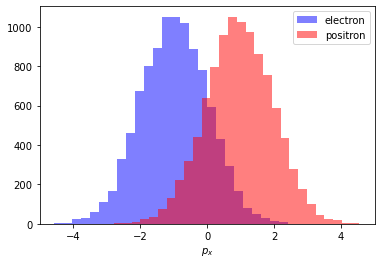

In [5]:
plt.hist(sig_data, color='b', alpha=0.5, bins=30, label='electron')
plt.hist(bck_data, color='r', alpha=0.5, bins=30, label='positron')
plt.xlim(-5, 5), plt.xlabel('$p_x$')
plt.legend()

### Real case
Particles are misclassified: the distributions are distorted
Example: identification with 80% efficiency.

In [7]:
n_sig1, n_bck1 = 8000, 2000 # There is 20% of misidentified background in signal
n_sig2, n_bck2 = 2000, 8000 # There is 20% of misidentified signal in background
first_bin = numpy.concatenate([sig_data[:n_sig1], bck_data[:n_bck1]])
second_bin = numpy.concatenate([sig_data[n_sig1:], bck_data[n_bck1:]])

((-5.0, 5.0), Text(0.5, 0, '$p_x$'))

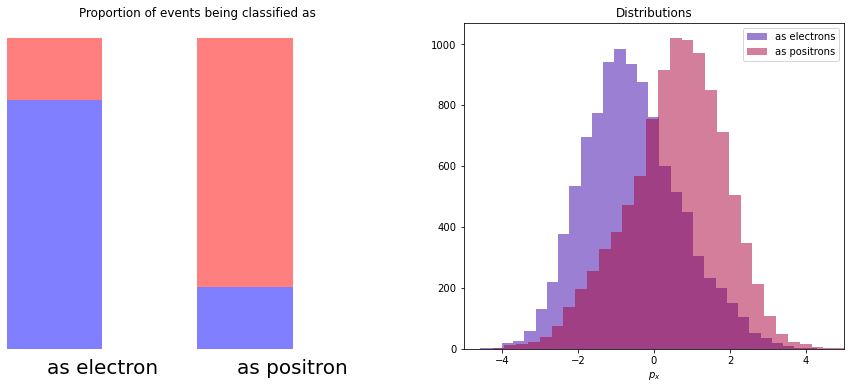

In [8]:
plt.figure(figsize=[15, 6])
plt.subplot(121)
plt.bar([0, 2], [n_sig1, n_sig2], width=1, color='b', alpha=0.5)
plt.bar([0, 2], [n_bck1, n_bck2], width=1, bottom=[n_sig1, n_sig2], color='r', alpha=0.5)
plt.xlim(-0.5, 3.5)

plt.axis('off')
plt.xticks([0.5, 2.5], ['as electrons', 'as positrons'])
plt.text(0.5, -300, 'as electron', horizontalalignment='center', verticalalignment='top', fontsize=20)
plt.text(2.5, -300, 'as positron', horizontalalignment='center', verticalalignment='top', fontsize=20)
plt.title('Proportion of events being classified as')

plt.subplot(122)
plt.hist(first_bin, alpha=0.5, bins=30, label='as electrons', color=(0.22, 0., 0.66))
plt.hist(second_bin, alpha=0.5, bins=30, label='as positrons', color=(0.66, 0., 0.22))
plt.legend()
plt.title('Distributions')
plt.xlim(-5, 5), plt.xlabel('$p_x$')

## sWeights
We can try to sum up the two distributions with some factors in order to retrieve the original distribution.
To retrieve the signal distribution, we can do:
$$0.8\times f_{sig} - 0.2 \times f_{bkg}$$

In [10]:
def plot_with_weights(datas, weights, **kargs):
    assert len(datas) == len(weights)
    data = numpy.concatenate(datas) # full data
    weight = numpy.concatenate([numpy.ones(len(d)) * w for d, w in zip(datas, weights)])
    plt.hist(data, weights=weight, alpha=0.5, bins=30, **kargs) # each bin is * by the corresponding weight[..]

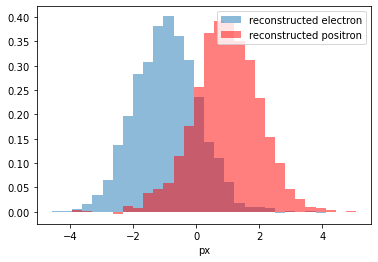

In [12]:
plot_with_weights([first_bin, second_bin], [n_bck2, -n_bck1], density=True, label='reconstructed electron')
plot_with_weights([first_bin, second_bin], [-n_sig2, n_sig1], density=True, color='r', label='reconstructed positron')
plt.xlabel('px')
plt.legend()

## Compare the reconstructed distribution for electrons with an original one

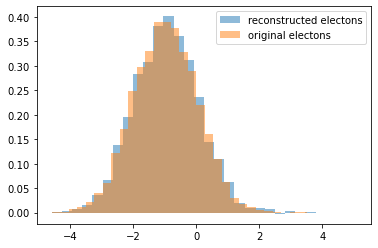

In [13]:
plot_with_weights([first_bin, second_bin], [n_bck2, -n_bck1], density=True, label='reconstructed electons', edgecolor='none')
plot_with_weights([sig_data], [1], density=True, label='original electons', edgecolor='none')
plt.legend()